# Introduction

As an alternative to the Kraken2 taxonomy we decided to use GTDBTK database to identify taxonomy for bacteria. Sadly the decision to abandon kraken has come late in the semester and not enough time was left to complete the notebook. The heat tree has a error in the shape of the dataset that ignores the sample information, resulting in the same heat tree for whatever filter (category, country, ecc..) is imposed.

- Load gtdbtk for bacteria
- extract feature table from derep (from 05_skANI) for bacteria
- load feature tables
- load metadata_extended

- for the heat tree:
    - give reference_taxonomy to feature table
    - reduce metadata as sample_id, food_category and country

- heatmap on species and order level per country and category
- heat-tree for bacteria per category (incomplete)

In [31]:
import pandas as pd

## Load Taxonomy

In [2]:
taxonomy_bacteria = pd.read_csv('data/processed/06_Taxonomy/gtdbtk.bac120.ani_summary.tsv', sep = '\t')
taxonomy_bacteria.head(3)

,user_genome,reference_genome,skani_ani,skani_af,reference_taxonomy,"other_related_references(genome_id,species_name,radius,ANI,AF)"
0,01b54364-1bbb-43e7-9366-a931641ff6cd,GCF_001437285.1,98.78,0.7899,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,NaN
1,01bfbb6d-8bcb-40fc-b639-b0c66897a07b,GCF_000963945.1,96.30,0.8917,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,NaN
2,01c257e7-cc4e-41ba-9f3d-bdfc0a851d09,GCF_000423785.1,98.91,0.8750,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,"GCF_003795125.1, s__Tetragenococcus osmophilus..."


In [3]:
taxonomy_archaea = pd.read_csv('data/processed/06_Taxonomy/gtdbtk.ar53.summary.tsv', sep = '\t')
taxonomy_archaea.head(3)

,user_genome,classification,closest_genome_reference,closest_genome_reference_radius,closest_genome_taxonomy,closest_genome_ani,closest_genome_af,closest_placement_reference,closest_placement_radius,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",msa_percent,translation_table,red_value,warnings
0,31340bdb-4c55-485d-90a2-2771ddef78c0,d__Archaea;p__Halobacteriota;c__Halobacteria;o...,GCF_000337695.1,95.0,d__Archaea;p__Halobacteriota;c__Halobacteria;o...,96.05,0.867,NaN,NaN,NaN,NaN,NaN,NaN,ani_screen,classification based on ANI only,"GCF_000328685.1, s__Natronococcus occultus, 95...",NaN,NaN,NaN,NaN
1,50f5e6a6-61a8-4555-acf4-12debc53cdc0,d__Archaea;p__Halobacteriota;c__Halobacteria;o...,GCF_000336715.1,95.0,d__Archaea;p__Halobacteriota;c__Halobacteria;o...,97.79,0.940,NaN,NaN,NaN,NaN,NaN,NaN,ani_screen,classification based on ANI only,"GCF_000336695.1, s__Halococcus morrhuae, 95.0,...",NaN,NaN,NaN,NaN


## Extract feature tables

```
!qiime tools export \
    --input-path data/processed/06_Taxonomy/Feature_tables/bacteria_filtered_medium_derep_table.qza \
    --output-path data/processed/06_Taxonomy/Feature_tables/bacteria_feature_table
```

```
!qiime tools export \
    --input-path data/processed/06_Taxonomy/Feature_tables/archaea_filtered_medium_derep_table.qza \
    --output-path data/processed/06_Taxonomy/Feature_tables/archea_feature_table
```

## Load Feature Tables

In [4]:
!pip install biom-format

In [5]:
from biom import load_table
import pandas as pd

bacteria_path = "data/processed/06_Taxonomy/Feature_tables/bacteria_feature_table/feature-table.biom"
table_bacteria = load_table(bacteria_path)
df_bacteria = table_bacteria.to_dataframe(dense=True)


# Strip prefix up to first "_" from column names
print("Columns before merging:")
print(df_bacteria.columns.tolist())
df_bacteria.columns = df_bacteria.columns.str.split('_', n=1).str[-1]

# Merge duplicate sample columns by summing (future-proof)
df_bacteria_merged = (
    df_bacteria
    .T.groupby(level=0)
    .sum()
    .T
)


print("\nColumns after merging:")
print(df_bacteria_merged.columns.tolist())
df_bacteria_merged.head(3)

Columns before merging:
['IL_A001', 'IL_A002', 'IL_B037_La_Ac_La', 'IL_B038_Az_Gp_La', 'IL_B039_Aa_Gp_La', 'IL_B051_Aj_Po_Laf', 'IL_B056_Sc_Na_Af', 'IL_HM010-01', 'IL_HM010-03', 'IL_M002', 'IL_M008', 'IL_M009', 'IL_M010', 'IL_M012', 'IL_MS001-3', 'IL_MS003-2', 'IL_MS003-3', 'IL_MS005-1', 'IL_MS009-1', 'IL_MS009-2', 'IL_MS011-1', 'IL_MS013-1', 'IL_P003', 'IL_P009', 'PB_36fe4', 'PB_3ee22', 'PB_A001', 'PB_B039_Aa_Gp_La', 'PB_B051_Aj_Po_Laf', 'PB_B056_Sc_Na_Af', 'PB_HM010-01', 'PB_HM010-03', 'PB_M008', 'PB_M009', 'PB_M010', 'PB_MS001-3', 'PB_MS003-2', 'PB_MS005-1', 'PB_MS009-1', 'PB_MS013-1', 'PB_P001', 'PB_P003', 'PB_P009', 'PB_a36ba', 'PB_e7c76']

Columns after merging:
['36fe4', '3ee22', 'A001', 'A002', 'B037_La_Ac_La', 'B038_Az_Gp_La', 'B039_Aa_Gp_La', 'B051_Aj_Po_Laf', 'B056_Sc_Na_Af', 'HM010-01', 'HM010-03', 'M002', 'M008', 'M009', 'M010', 'M012', 'MS001-3', 'MS003-2', 'MS003-3', 'MS005-1', 'MS009-1', 'MS009-2', 'MS011-1', 'MS013-1', 'P001', 'P003', 'P009', 'a36ba', 'e7c76']


,36fe4,3ee22,A001,A002,B037_La_Ac_La,B038_Az_Gp_La,B039_Aa_Gp_La,B051_Aj_Po_Laf,B056_Sc_Na_Af,HM010-01,...,MS005-1,MS009-1,MS009-2,MS011-1,MS013-1,P001,P003,P009,a36ba,e7c76
009d5f9a-be92-4328-b5ad-68d282a94e3b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0174159a-d8ba-4d10-995d-c9dddd2a0b48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01b54364-1bbb-43e7-9366-a931641ff6cd,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Load archaea feature table
archaea_path = 'data/processed/06_Taxonomy/Feature_tables/archea_feature_table/feature-table.biom'
table_archaea = load_table(archaea_path)
df_archaea = table_archaea.to_dataframe(dense=True)

# Strip prefix up to first "_" from column names
df_archaea.columns = df_archaea.columns.str.split('_', n=1).str[-1]

# Merge duplicate sample columns by summing (future-proof)
df_archaea_merged = (
    df_archaea
    .T.groupby(level=0)
    .sum()
    .T
)

# Inspect result
df_archaea_merged.head(3)


,B039_Aa_Gp_La,B056_Sc_Na_Af,MS001-3
09ebb84d-e6d1-4c36-871b-45bee0ad115d,0.0,1.0,0.0
31340bdb-4c55-485d-90a2-2771ddef78c0,0.0,0.0,1.0
50f5e6a6-61a8-4555-acf4-12debc53cdc0,1.0,0.0,1.0


## load metadata_extended

In [7]:
metadata = pd.read_csv(
    'data/processed/metadata/Metadata_Extended_current.tsv',
    sep='\t'
)

# Keep only relevant columns
metadata = metadata[['sample', 'samp_country', 'category']]

# Keep only unique samples
metadata_unique = metadata.drop_duplicates(subset='sample')

# Save to file
output_path = "data/processed/06_Taxonomy/hmp_samples.tsv"
metadata_unique.to_csv(output_path, sep='\t', index=False)

metadata_unique.shape


(33, 3)

## give reference_taxonomy to feature table

In [8]:
# Set user_genome as index for joining
taxonomy_bacteria_idx = taxonomy_bacteria.set_index('user_genome')

# Join taxonomy
df_bacteria_merged = df_bacteria_merged.join(
    taxonomy_bacteria_idx['reference_taxonomy'],
    how='left'
)

# Drop rows with missing taxonomy
df_bacteria_merged = df_bacteria_merged.dropna(subset=['reference_taxonomy'])

# Move taxonomy to first column
cols = ['reference_taxonomy'] + [
    c for c in df_bacteria_merged.columns if c != 'reference_taxonomy'
]
df_bacteria_merged = df_bacteria_merged[cols]

df_bacteria_merged


,reference_taxonomy,36fe4,3ee22,A001,A002,B037_La_Ac_La,B038_Az_Gp_La,B039_Aa_Gp_La,B051_Aj_Po_Laf,B056_Sc_Na_Af,...,MS005-1,MS009-1,MS009-2,MS011-1,MS013-1,P001,P003,P009,a36ba,e7c76
01b54364-1bbb-43e7-9366-a931641ff6cd,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01bfbb6d-8bcb-40fc-b639-b0c66897a07b,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01c257e7-cc4e-41ba-9f3d-bdfc0a851d09,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
033e4bc6-2e06-4d36-a408-30aae536885c,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03727db6-e5bc-48a7-8dd0-01ef817cde25,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f42b93aa-6d42-4b28-b9bf-e3c32ec14b42,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
f4534b02-6772-48b1-9541-db416f83700e,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f6ad1034-5a73-454c-a1be-5feb4333d647,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fc7c1562-4194-480d-afc1-d2e3c0d649a4,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
import pandas as pd
import re

# Example: df_bacteria_merged has a column 'reference_taxonomy'
# Create new columns for order and species
df_bacteria_merged['order_name'] = df_bacteria_merged['reference_taxonomy'].str.extract(r'o__([^;]+)')
df_bacteria_merged['species_name'] = df_bacteria_merged['reference_taxonomy'].str.extract(r's__([^;]+)')

# Optional: move them to be 2nd and 3rd columns
cols = ['reference_taxonomy', 'order_name', 'species_name'] + [c for c in df_bacteria_merged.columns if c not in ['reference_taxonomy','order_name','species_name']]
df_bacteria_merged = df_bacteria_merged[cols]

# Check result
print(df_bacteria_merged.head())


                                                                     reference_taxonomy  \
01b54364-1bbb-43e7-9366-a931641ff6cd  d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...   
01bfbb6d-8bcb-40fc-b639-b0c66897a07b  d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...   
01c257e7-cc4e-41ba-9f3d-bdfc0a851d09  d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...   
033e4bc6-2e06-4d36-a408-30aae536885c  d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...   
03727db6-e5bc-48a7-8dd0-01ef817cde25  d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...   

                                           order_name  \
01b54364-1bbb-43e7-9366-a931641ff6cd  Lactobacillales   
01bfbb6d-8bcb-40fc-b639-b0c66897a07b  Acetobacterales   
01c257e7-cc4e-41ba-9f3d-bdfc0a851d09  Lactobacillales   
033e4bc6-2e06-4d36-a408-30aae536885c  Lactobacillales   
03727db6-e5bc-48a7-8dd0-01ef817cde25  Lactobacillales   

                                                     species_name  36fe4  \
01b54364-1bbb-43e7-9366-a931641ff6

In [10]:
import pandas as pd

# Keep only index and the new columns plus sample columns
df_subset = df_bacteria_merged.copy()
sample_cols = df_subset.columns.difference(['reference_taxonomy', 'order_name', 'species_name'])

# Extract only the relevant columns
df_subset = df_subset[['reference_taxonomy', 'order_name', 'species_name'] + list(sample_cols)]

# Group by order_name and sum all numeric columns (sample counts)
df_grouped = df_subset.groupby('order_name')[sample_cols].sum().reset_index()

# Optional: inspect result
print(df_grouped.head())


        order_name  36fe4  3ee22  A001  A002  B037_La_Ac_La  B038_Az_Gp_La  \
0  Acetobacterales    1.0    0.0   0.0   0.0            0.0            0.0   
1  Actinomycetales    0.0    0.0   0.0   0.0            0.0            0.0   
2       Bacillales    0.0    0.0   0.0   0.0            0.0            0.0   
3     Bacillales_A    0.0    0.0   0.0   0.0            0.0            0.0   
4    Bacteroidales    0.0    0.0   0.0   0.0            0.0            0.0   

   B039_Aa_Gp_La  B051_Aj_Po_Laf  B056_Sc_Na_Af  ...  MS005-1  MS009-1  \
0            0.0             2.0            3.0  ...      0.0      0.0   
1            0.0             0.0            0.0  ...      0.0      0.0   
2            0.0             0.0            2.0  ...      0.0      0.0   
3            0.0             0.0            0.0  ...      0.0      0.0   
4            0.0             1.0            0.0  ...      0.0      0.0   

   MS009-2  MS011-1  MS013-1  P001  P003  P009  a36ba  e7c76  
0      0.0      0.0    

In [11]:
import pandas as pd

# Assuming df_grouped has columns: order_name + sample columns
# And metadata_unique has columns: sample, samp_country, category

# 1. Melt the order-level table to long format
df_long = df_grouped.melt(
    id_vars='order_name', 
    var_name='sample', 
    value_name='count'
)

# 2. Merge with metadata
df_merged = df_long.merge(metadata_unique, on='sample', how='left')

# 3. Optional: pivot so that orders are rows and samples remain columns
df_pivot = df_merged.pivot_table(
    index='order_name', 
    columns='sample', 
    values='count', 
    fill_value=0
)

# 4. If you want metadata info alongside, you can merge it separately as needed
# Example: merge metadata with pivoted table for sample annotations
df_pivot_with_meta = df_pivot.T.merge(metadata_unique, left_index=True, right_on='sample')

# Inspect result
print(df_pivot_with_meta.head())


      Acetobacterales  Actinomycetales  Bacillales  Bacillales_A  \
417               1.0              0.0         0.0           0.0   
878               0.0              0.0         0.0           0.0   
508               0.0              0.0         0.0           0.0   
1403              0.0              0.0         0.0           0.0   
799               0.0              0.0         0.0           0.0   

      Bacteroidales  Campylobacterales  Clostridiales  Enterobacterales  \
417             0.0                0.0            0.0               0.0   
878             0.0                0.0            0.0               0.0   
508             0.0                0.0            0.0               0.0   
1403            0.0                0.0            0.0               0.0   
799             0.0                0.0            0.0               0.0   

      Halanaerobiales  Lactobacillales  Mycobacteriales  Peptostreptococcales  \
417               0.0              3.0              0.0    

/tmp/ipykernel_22735/395364249.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_species_heatmap = df_species_country.pivot(index='species_name', columns='category', values='count').fillna(0)


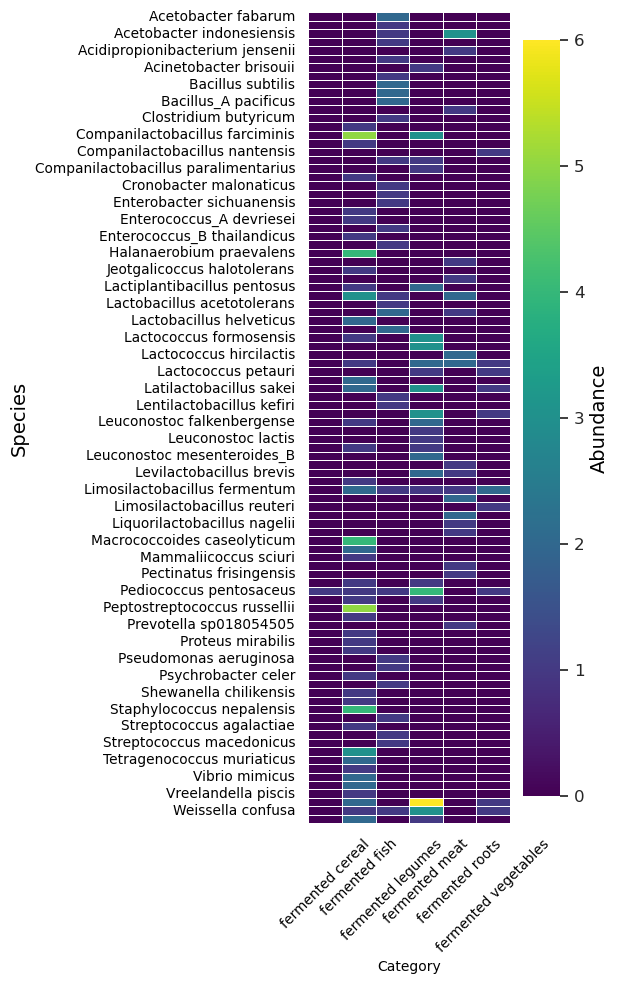

In [12]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Melt the species-level table to long format
df_species_long = df_subset.melt(
    id_vars=['species_name'],  # species as rows
    var_name='sample',
    value_name='count'
)

# 2. Merge with metadata to get 'samp_country'
df_species_long = df_species_long.merge(metadata_unique, on='sample', how='left')

# 3. Aggregate counts by sample country and species
df_species_country = df_species_long.groupby(['category', 'species_name'])['count'].sum().reset_index()

# 4. Pivot to wide format: rows = species_name, columns = samp_country
df_species_heatmap = df_species_country.pivot(index='species_name', columns='category', values='count').fillna(0)

# 5. Plot heatmap with counts

plt.figure(figsize=(6,10))  # adjust for many species
sns.set(font_scale=0.9)

ax = sns.heatmap(
    df_species_heatmap,
    cmap="viridis",
    annot=False,        # show numbers in every cell
    fmt=".0f",         # integer format
    linewidths=0.5,
    cbar_kws={'label': 'Abundance'}
)

# Make all axis text black
ax.tick_params(axis='x', colors='black', labelrotation=45)
ax.tick_params(axis='y', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.title.set_color('black')

# Make colorbar numbers larger
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)  # adjust number size
cbar.ax.yaxis.label.set_color('black')
cbar.ax.yaxis.label.set_fontsize(14)  # colorbar label size

plt.xlabel("Category", fontsize=10)
plt.ylabel("Species", fontsize=14)
plt.tight_layout()
plt.savefig("data/Visualizations/Taxonomy_heatmap_s_category.svg", transparent=True)
plt.show()

/tmp/ipykernel_22735/41300038.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_species_heatmap = df_species_country.pivot(index='species_name', columns='samp_country', values='count').fillna(0)


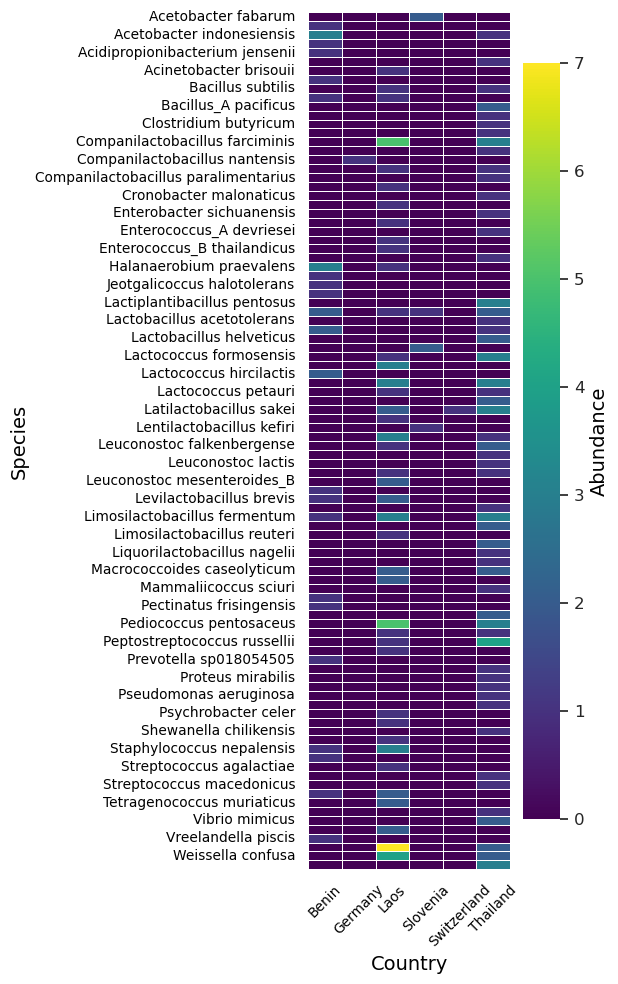

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Melt the species-level table to long format
df_species_long = df_subset.melt(
    id_vars=['species_name'],  # species as rows
    var_name='sample',
    value_name='count'
)

# 2. Merge with metadata to get 'samp_country'
df_species_long = df_species_long.merge(metadata_unique, on='sample', how='left')

# 3. Aggregate counts by sample country and species
df_species_country = df_species_long.groupby(['samp_country', 'species_name'])['count'].sum().reset_index()

# 4. Pivot to wide format: rows = species_name, columns = samp_country
df_species_heatmap = df_species_country.pivot(index='species_name', columns='samp_country', values='count').fillna(0)


plt.figure(figsize=(6,10))  # adjust for many species
sns.set(font_scale=0.9)

ax = sns.heatmap(
    df_species_heatmap,
    cmap="viridis",
    annot=False,        # show numbers in every cell
    fmt=".0f",         # integer format
    linewidths=0.5,
    cbar_kws={'label': 'Abundance'}
)

# Make all axis text black
ax.tick_params(axis='x', colors='black', labelrotation=45)
ax.tick_params(axis='y', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.title.set_color('black')

# Make colorbar numbers larger
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)  # adjust number size
cbar.ax.yaxis.label.set_color('black')
cbar.ax.yaxis.label.set_fontsize(14)  # colorbar label size

plt.xlabel("Country", fontsize=14)
plt.ylabel("Species", fontsize=14)
plt.tight_layout()
plt.savefig("data/Visualizations/Taxonomy_heatmap_s_country.svg", transparent=True)
plt.show()


/tmp/ipykernel_22735/4032754915.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_species_heatmap = df_species_country.pivot(index='order_name', columns='samp_country', values='count').fillna(0)


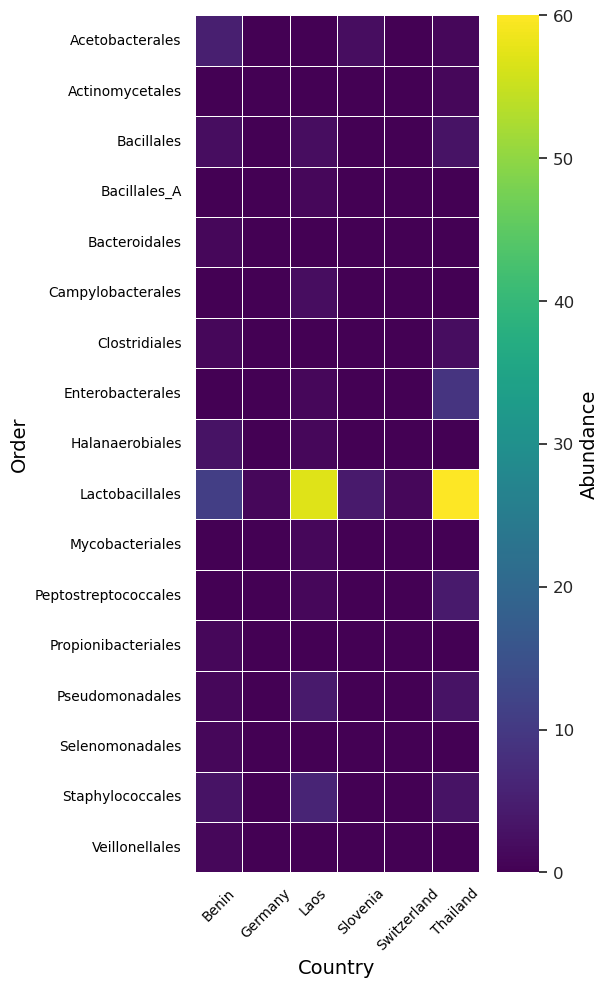

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Melt the species-level table to long format
df_species_long = df_subset.melt(
    id_vars=['order_name'],  # species as rows
    var_name='sample',
    value_name='count'
)

# 2. Merge with metadata to get 'samp_country'
df_species_long = df_species_long.merge(metadata_unique, on='sample', how='left')

# 3. Aggregate counts by sample country and species
df_species_country = df_species_long.groupby(['samp_country', 'order_name'])['count'].sum().reset_index()

# 4. Pivot to wide format: rows = species_name, columns = samp_country
df_species_heatmap = df_species_country.pivot(index='order_name', columns='samp_country', values='count').fillna(0)

# 5. Plot heatmap with counts
plt.figure(figsize=(6,10))  # adjust for many species
sns.set(font_scale=0.9)

ax = sns.heatmap(
    df_species_heatmap,
    cmap="viridis",
    annot=False,        # show numbers in every cell
    fmt=".0f",         # integer format
    linewidths=0.5,
    cbar_kws={'label': 'Abundance'}
)

# Make all axis text black
ax.tick_params(axis='x', colors='black', labelrotation=45)
ax.tick_params(axis='y', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.title.set_color('black')

# Make colorbar numbers larger
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)  # adjust number size
cbar.ax.yaxis.label.set_color('black')
cbar.ax.yaxis.label.set_fontsize(14)  # colorbar label size

plt.xlabel("Country", fontsize=14)
plt.ylabel("Order", fontsize=14)
plt.tight_layout()
plt.savefig("data/Visualizations/Taxonomy_heatmap_O_country.svg", transparent=True)
plt.show()

/tmp/ipykernel_22735/2606313197.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_species_heatmap = df_species_country.pivot(index='order_name', columns='category', values='count').fillna(0)


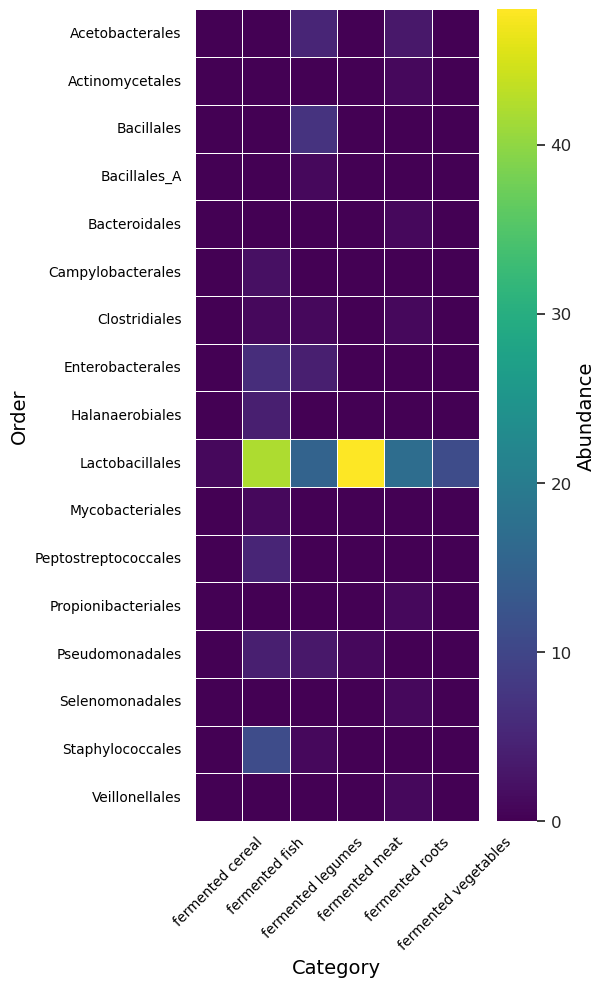

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Melt the species-level table to long format
df_species_long = df_subset.melt(
    id_vars=['order_name'],  # species as rows
    var_name='sample',
    value_name='count'
)

# 2. Merge with metadata to get 'samp_country'
df_species_long = df_species_long.merge(metadata_unique, on='sample', how='left')

# 3. Aggregate counts by sample country and species
df_species_country = df_species_long.groupby(['category', 'order_name'])['count'].sum().reset_index()

# 4. Pivot to wide format: rows = species_name, columns = samp_country
df_species_heatmap = df_species_country.pivot(index='order_name', columns='category', values='count').fillna(0)

plt.figure(figsize=(6,10))  # adjust for many species
sns.set(font_scale=0.9)

ax = sns.heatmap(
    df_species_heatmap,
    cmap="viridis",
    annot=False,        # show numbers in every cell
    fmt=".0f",         # integer format
    linewidths=0.5,
    cbar_kws={'label': 'Abundance'}
)

# Make all axis text black
ax.tick_params(axis='x', colors='black', labelrotation=45)
ax.tick_params(axis='y', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.title.set_color('black')

# Make colorbar numbers larger
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)  # adjust number size
cbar.ax.yaxis.label.set_color('black')
cbar.ax.yaxis.label.set_fontsize(14)  # colorbar label size

plt.xlabel("Category", fontsize=14)
plt.ylabel("Order", fontsize=14)
plt.tight_layout()
plt.savefig("data/Visualizations/Taxonomy_heatmap_O_category.svg", transparent=True)
plt.show()


In [16]:
# Move index to column
df_bacteria_merged = df_bacteria_merged.reset_index().rename(columns={'index': 'otu_id'})

# Rename taxonomy column ONLY if it exists
if 'reference_taxonomy' in df_bacteria_merged.columns:
    df_bacteria_merged = df_bacteria_merged.rename(columns={'reference_taxonomy': 'lineage'})

# Reorder columns safely
desired_cols = ['otu_id', 'lineage']
remaining_cols = [c for c in df_bacteria_merged.columns if c not in desired_cols]
df_bacteria_merged = df_bacteria_merged[desired_cols + remaining_cols]

print(df_bacteria_merged)

output_path = "data/processed/06_Taxonomy/hmp_otus.tsv"
df_bacteria_merged.to_csv(output_path, sep='\t', index=False)

                                   otu_id  \
0    01b54364-1bbb-43e7-9366-a931641ff6cd   
1    01bfbb6d-8bcb-40fc-b639-b0c66897a07b   
2    01c257e7-cc4e-41ba-9f3d-bdfc0a851d09   
3    033e4bc6-2e06-4d36-a408-30aae536885c   
4    03727db6-e5bc-48a7-8dd0-01ef817cde25   
..                                    ...   
129  f42b93aa-6d42-4b28-b9bf-e3c32ec14b42   
130  f4534b02-6772-48b1-9541-db416f83700e   
131  f6ad1034-5a73-454c-a1be-5feb4333d647   
132  fc7c1562-4194-480d-afc1-d2e3c0d649a4   
133  fd2edd56-e372-4eee-8a66-859b295f3954   

                                               lineage       order_name  \
0    d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...  Lactobacillales   
1    d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...  Acetobacterales   
2    d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...  Lactobacillales   
3    d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...  Lactobacillales   
4    d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...  Lactobacillales   
..       

## setup R environment

In [17]:
!pip install rpy2
%load_ext rpy2.ipython
import rpy2

In [18]:
%%R
install.packages("remotes")
remotes::install_github("grunwaldlab/metacoder")
library(metacoder)
library(readr)


--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]                   2: Australia (Canberra) [https]   
 3: Australia (Melbourne 1) [https]   4: Australia (Melbourne 2) [https]
 5: Austria (Wien) [https]            6: Belgium (Brussels) [https]     
 7: Brazil (PR) [https]               8: Brazil (SP 1) [https]          
 9: Brazil (SP 2) [https]            10: Bulgaria [https]               
11: Canada (MB) [https]              12: Canada (ON 1) [https]          
13: Canada (ON 2) [https]            14: Chile (Santiago) [https]       
15: China (Beijing 1) [https]        16: China (Beijing 2) [https]      
17: China (Beijing 3) [https]        18: China (Hefei) [https]          
19: China (Hong Kong) [https]        20: China (Lanzhou) [https]        
21: China (Nanjing) [https]          22: China (Shanghai 2) [https]     
23: China (Shenzhen) [https]         24: China (Wuhan) [https]          
25: Colombia (Cali) [https]          26: C

Selection:  60


R[write to console]: trying URL 'https://stat.ethz.ch/CRAN/src/contrib/remotes_2.5.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 164496 bytes (160 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

## import taxonomy and metadata

In [19]:
%%R
hmp_otus <- read_tsv(
  "data/processed/06_Taxonomy/hmp_otus.tsv",
  show_col_types = FALSE
)
hmp_samples <- read_tsv(
  "data/processed/06_Taxonomy/hmp_samples.tsv",
  show_col_types = FALSE
)

## shape data following metacoder tutorial

In [20]:
%%R
obj <- parse_tax_data(hmp_otus,
                      class_cols = "lineage", # the column that contains taxonomic information
                      class_sep = ";", # The character used to separate taxa in the classification
                      class_regex = "^(.+)__(.+)$", # Regex identifying where the data for each taxon is
                      class_key = c(tax_rank = "info", # A key describing each regex capture group
                                    tax_name = "taxon_name"))
print(obj)

<Taxmap>
  207 taxa: ab. Bacteria ... hz. Leuconostoc mesenteroides
  207 edges: NA->ab, ab->ac, ab->ad ... dd->hx, df->hy, di->hz
  2 data sets:
    tax_data:
      # A tibble: 134 × 34
        taxon_id otu_id        lineage order_name species_name `36fe4`
        <chr>    <chr>         <chr>   <chr>      <chr>          <dbl>
      1 ei       01b54364-1bb… d__Bac… Lactobaci… Pediococcus…       0
      2 ej       01bfbb6d-8bc… d__Bac… Acetobact… Acetobacter…       0
      3 ek       01c257e7-cc4… d__Bac… Lactobaci… Tetragenoco…       0
      # ℹ 131 more rows
      # ℹ 28 more variables: `3ee22` <dbl>, A001 <dbl>, A002 <dbl>,
      #   B037_La_Ac_La <dbl>, B038_Az_Gp_La <dbl>,
      #   B039_Aa_Gp_La <dbl>, B051_Aj_Po_Laf <dbl>,
      #   B056_Sc_Na_Af <dbl>, `HM010-01` <dbl>, `HM010-03` <dbl>, …
      # ℹ Use `print(n = ...)` to see more rows, and `colnames()` to see all variable names
    class_data:
      # A tibble: 938 × 5
        taxon_id input_index tax_rank tax_name  regex_matc

## plot per category of food at species sample

In [21]:
%%R
# Calculate taxon abundances using all sample columns
obj$data$tax_abund <- calc_taxon_abund(obj, "tax_data", 
                                       cols = hmp_samples$sample_id)

# Attach full sample metadata to the Taxmap object
obj$data$sample_metadata <- hmp_samples



R[write to console]: No `cols` specified, so using all numeric columns:
   36fe4, 3ee22, A001, A002 ... P003, P009, a36ba, e7c76


R[write to console]: Summing per-taxon counts from 29 columns for 207 taxa



R[write to console]: No `cols` specified, so using all numeric columns:
   36fe4, 3ee22, A001, A002 ... P003, P009, a36ba, e7c76


R[write to console]: Summing per-taxon counts from 29 columns for 207 taxa

R[write to console]: No `cols` specified, so using all numeric columns:
   36fe4, 3ee22, A001, A002 ... P003, P009, a36ba, e7c76


R[write to console]: Summing per-taxon counts from 29 columns for 207 taxa

R[write to console]: No `cols` specified, so using all numeric columns:
   36fe4, 3ee22, A001, A002 ... P003, P009, a36ba, e7c76


R[write to console]: Summing per-taxon counts from 29 columns for 207 taxa

R[write to console]: No `cols` specified, so using all numeric columns:
   36fe4, 3ee22, A001, A002 ... P003, P009, a36ba, e7c76


R[write to console]: Summing per-taxon counts from 29 columns for 207 taxa

R[write to console]: No `cols` specified, so using all numeric columns:
   36fe4, 3ee22, A001, A002 ... P003, P009, a36ba, e7c76


R[write to console]: Summing per-taxon co

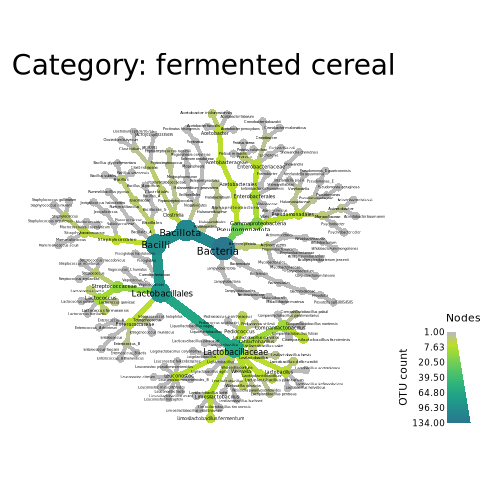

In [22]:
%%R
library(metacoder)

# Example 1: fermented fish
cat_samples <- obj$data$sample_metadata$sample_id[obj$data$sample_metadata$category == "fermented fish"]
obj_cat <- obj
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),    # or sum of abundances
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Category: fermented fish",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/heat_tree_fermented_fish.pdf")


# Example 2: fermented roots
cat_samples <- obj$data$sample_metadata$sample_id[obj$data$sample_metadata$category == "fermented roots"]
obj_cat <- obj
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Category: fermented roots",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/heat_tree_fermented_roots.pdf")

# Example 3:fermented vegetables
cat_samples <- obj$data$sample_metadata$sample_id[obj$data$sample_metadata$category == "fermented vegetables"]
obj_cat <- obj
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Category: fermented vegetables",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/heat_tree_fermented_vegetables.pdf")

# Example 4: fermented meat
cat_samples <- obj$data$sample_metadata$sample_id[obj$data$sample_metadata$category == "fermented meat"]
obj_cat <- obj
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Category: fermented meat",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/heat_tree_fermented_meat.pdf")

# Example 5: fermented legumes
cat_samples <- obj$data$sample_metadata$sample_id[obj$data$sample_metadata$category == "fermented legumes"]
obj_cat <- obj
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Category: fermented legumes",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/heat_tree_fermented_legumes.pdf")

# Example 6: fermented cereal
cat_samples <- obj$data$sample_metadata$sample_id[obj$data$sample_metadata$category == "fermented cereal"]
obj_cat <- obj
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Category: fermented cereal",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/heat_tree_fermented_cereal.pdf")


## plot at family level for better readability

In [23]:
%%R
library(dplyr)
library(stringr)

# Assume hmp_otus has columns: otu_id, lineage, sample columns...
# We truncate lineages after family (f__)

hmp_otus_trunc <- hmp_otus %>%
  mutate(
    # Split lineage by ";" and keep only up to family
    lineage = sapply(str_split(lineage, ";"), function(x) {
      # Keep only ranks up to family (d,p,c,o,f)
      keep <- grepl("^[dpcof]__", x)
      paste(x[keep], collapse = ";")
    })
  )

# Inspect the result
head(hmp_otus_trunc)


R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# A tibble: 6 × 33
  otu_id             lineage order_name species_name `36fe4` `3ee22`  A001  A002
  <chr>              <chr>   <chr>      <chr>          <dbl>   <dbl> <dbl> <dbl>
1 01b54364-1bbb-43e… d__Bac… Lactobaci… Pediococcus…       0       0     1     0
2 01bfbb6d-8bcb-40f… d__Bac… Acetobact… Acetobacter…       0       0     0     0
3 01c257e7-cc4e-41b… d__Bac… Lactobaci… Tetragenoco…       0       0     0     0
4 033e4bc6-2e06-4d3… d__Bac… Lactobaci… Companilact…       0       0     1     0
5 03727db6-e5bc-48a… d__Bac… Lactobaci… Lactococcus…       0       0     1     0
6 041916a5-9dc9-4d7… d__Bac… Lactobaci… Enterococcu…       0       0     0     0
# ℹ 25 more variables: B037_La_Ac_La <dbl>, B038_Az_Gp_La <dbl>,
#   B039_Aa_Gp_La <dbl>, B051_Aj_Po_Laf <dbl>, B056_Sc_Na_Af <dbl>,
#   `HM010-01` <dbl>, `HM010-03` <dbl>, M002 <dbl>, M008 <dbl>, M009 <dbl>,
#   M010 <dbl>, M012 <dbl>, `MS001-3` <dbl>, `MS003-2` <dbl>, `MS003-3` <dbl>,
#   `MS005-1` <dbl>, `MS009-1` <dbl>, `MS009-

In [24]:
%%R
library(metacoder)

# Parse OTU table into Taxmap object
obj_trunc <- parse_tax_data(hmp_otus_trunc,
                      class_cols = "lineage",  # truncated lineage column
                      class_sep = ";",         # separator in lineage
                      class_regex = "^(.+)__(.+)$",
                      class_key = c(tax_rank = "info",
                                    tax_name = "taxon_name"))

# Inspect the Taxmap object
print(obj_trunc)


<Taxmap>
  59 taxa: ab. Bacteria, ac. Bacillota ... ch. Carnobacteriaceae
  59 edges: NA->ab, ab->ac, ab->ad ... bf->cf, bg->cg, aq->ch
  2 data sets:
    tax_data:
      # A tibble: 134 × 34
        taxon_id otu_id        lineage order_name species_name `36fe4`
        <chr>    <chr>         <chr>   <chr>      <chr>          <dbl>
      1 bh       01b54364-1bb… d__Bac… Lactobaci… Pediococcus…       0
      2 bi       01bfbb6d-8bc… d__Bac… Acetobact… Acetobacter…       0
      3 bj       01c257e7-cc4… d__Bac… Lactobaci… Tetragenoco…       0
      # ℹ 131 more rows
      # ℹ 28 more variables: `3ee22` <dbl>, A001 <dbl>, A002 <dbl>,
      #   B037_La_Ac_La <dbl>, B038_Az_Gp_La <dbl>,
      #   B039_Aa_Gp_La <dbl>, B051_Aj_Po_Laf <dbl>,
      #   B056_Sc_Na_Af <dbl>, `HM010-01` <dbl>, `HM010-03` <dbl>, …
      # ℹ Use `print(n = ...)` to see more rows, and `colnames()` to see all variable names
    class_data:
      # A tibble: 670 × 5
        taxon_id input_index tax_rank tax_name  regex

In [25]:
%%R
library(metacoder)

# Attach full sample metadata to the Taxmap object
obj_trunc$data$sample_metadata <- hmp_samples

# Optional: check that everything is attached correctly
obj_trunc$data$tax_abund[1:5, 1:5]  # first few OTU abundances
head(obj_trunc$data$sample_metadata)


# A tibble: 6 × 3
  sample        samp_country category            
  <chr>         <chr>        <chr>               
1 B039_Aa_Gp_La Benin        fermented fish      
2 MS001-3       Laos         fermented fish      
3 9b8b5         Germany      fermented roots     
4 M008          Thailand     fermented fish      
5 B038_Az_Gp_La Benin        fermented fish      
6 e7c76         Switzerland  fermented vegetables


R[write to console]: Summing per-taxon counts from 13 columns for 59 taxa



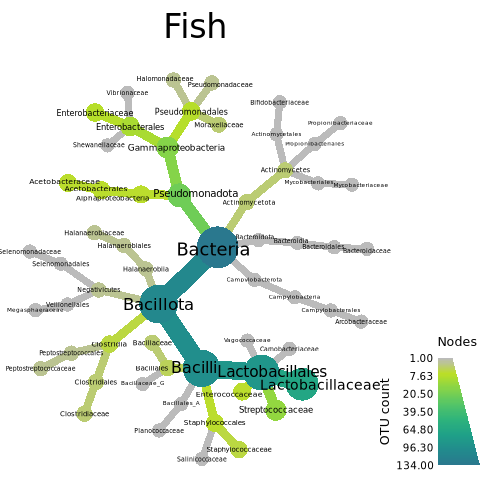

In [26]:
%%R
# Correct column
sample_col <- "sample"

# Extract fermented fish samples
cat_samples <- obj_trunc$data$sample_metadata[[sample_col]][
  obj_trunc$data$sample_metadata$category == "fermented fish"
]

# Keep only samples that exist in tax_data
cat_samples <- intersect(cat_samples, colnames(obj_trunc$data$tax_data))

# Remove duplicates
cat_samples <- unique(cat_samples)

# Subset Taxmap object
obj_cat <- obj_trunc
obj_cat$data$tax_abund <- calc_taxon_abund(
  obj_cat,
  "tax_data",
  cols = cat_samples
)
heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),    # or sum of abundances
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Fish",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/HT_trunc_fermented_fish.pdf")


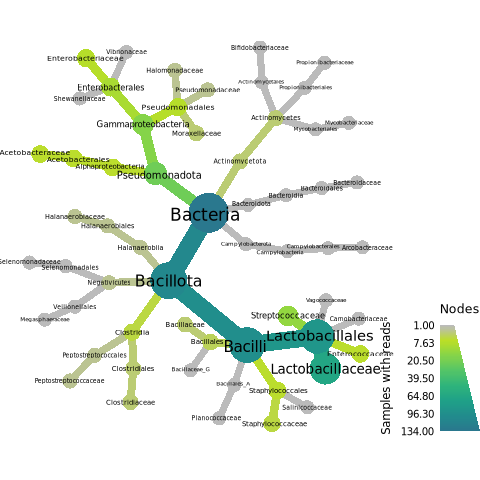

In [27]:
%%R
# Subset the Taxmap object to include only taxa up to family (f)
set.seed(1)
heat_tree(obj_trunc, 
          node_label = obj_trunc$taxon_names(),
          node_size = obj_trunc$n_obs(),
          node_color = obj_trunc$n_obs(),
          node_size_axis_label = "OTU count",
          node_color_axis_label = "Samples with reads",
          layout = "davidson-harel",    # Primary layout algorithm
          initial_layout = "reingold-tilford")  # Layout algorithm that initializes node locations


R[write to console]: No `cols` specified, so using all numeric columns:
   36fe4, 3ee22, A001, A002 ... P003, P009, a36ba, e7c76


R[write to console]: Summing per-taxon counts from 29 columns for 59 taxa

R[write to console]: No `cols` specified, so using all numeric columns:
   36fe4, 3ee22, A001, A002 ... P003, P009, a36ba, e7c76


R[write to console]: Summing per-taxon counts from 29 columns for 59 taxa

R[write to console]: No `cols` specified, so using all numeric columns:
   36fe4, 3ee22, A001, A002 ... P003, P009, a36ba, e7c76


R[write to console]: Summing per-taxon counts from 29 columns for 59 taxa

R[write to console]: No `cols` specified, so using all numeric columns:
   36fe4, 3ee22, A001, A002 ... P003, P009, a36ba, e7c76


R[write to console]: Summing per-taxon counts from 29 columns for 59 taxa

R[write to console]: No `cols` specified, so using all numeric columns:
   36fe4, 3ee22, A001, A002 ... P003, P009, a36ba, e7c76


R[write to console]: Summing per-taxon counts

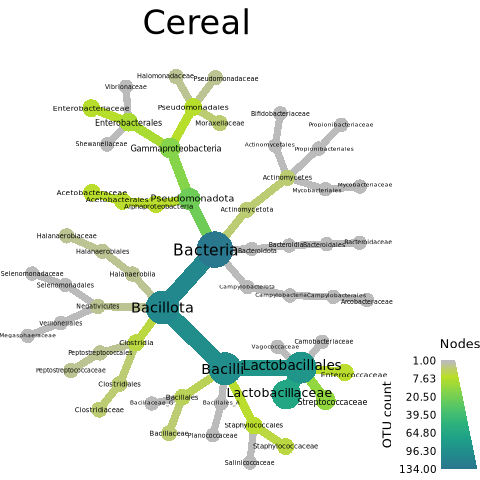

In [28]:
%%R
library(metacoder)
set.seed(1)
# Example 1: fermented fish
cat_samples <- obj_trunc$data$sample_metadata$sample_id[obj_trunc$data$sample_metadata$category == "fermented fish"]
obj_cat <- obj_trunc
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),    # or sum of abundances
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Fish",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/HT_trunc_fermented_fish.pdf")


# Example 2: fermented roots
cat_samples <- obj_trunc$data$sample_metadata$sample_id[obj_trunc$data$sample_metadata$category == "fermented roots"]
obj_cat <- obj_trunc
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Roots",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/HT_trunc_fermented_roots.pdf")

# Example 3:fermented vegetables
cat_samples <- obj_trunc$data$sample_metadata$sample_id[obj_trunc$data$sample_metadata$category == "fermented vegetables"]
obj_cat <- obj_trunc
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Vegetables",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/HT_trunc_fermented_vegetables.pdf")

# Example 4: fermented meat
cat_samples <- obj_trunc$data$sample_metadata$sample_id[obj_trunc$data$sample_metadata$category == "fermented meat"]
obj_cat <- obj_trunc
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Meat",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/HT_trunc_fermented_meat.pdf")

# Example 5: fermented legumes
cat_samples <- obj_trunc$data$sample_metadata$sample_id[obj_trunc$data$sample_metadata$category == "fermented legumes"]
obj_cat <- obj_trunc
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Legumes",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/HT_trunc_fermented_legumes.pdf")

# Example 6: fermented cereal
cat_samples <- obj_trunc$data$sample_metadata$sample_id[obj_trunc$data$sample_metadata$category == "fermented cereal"]
obj_cat <- obj_trunc
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Cereal",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/HT_trunc_fermented_cereal.pdf")


In [29]:
%%R
cat_samples <- obj_trunc$data$sample_metadata$sample_id[obj_trunc$data$sample_metadata$category == "fermented fish"]
obj_cat <- obj_trunc
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

R[write to console]: No `cols` specified, so using all numeric columns:
   36fe4, 3ee22, A001, A002 ... P003, P009, a36ba, e7c76


R[write to console]: Summing per-taxon counts from 29 columns for 59 taxa



In [30]:
%%R
cat_samples <- as.character(
  obj_trunc$data$sample_metadata$sample_id[
    obj_trunc$data$sample_metadata$category == "fermented fish"
  ]
)

obj_cat <- obj_trunc
obj_cat$data$tax_abund <- calc_taxon_abund(
  obj_cat, "tax_data", cols = cat_samples
)





R[write to console]: Error in data.frame(..., check.names = FALSE) : 
  arguments imply differing number of rows: 59, 0

R[write to console]: In addition: 
R[write to console]: There were 16 warnings (use warnings() to see them)
R[write to console]: 




Error in data.frame(..., check.names = FALSE) : 
  arguments imply differing number of rows: 59, 0


RInterpreterError: Failed to parse and evaluate line 'cat_samples <- as.character(\n  obj_trunc$data$sample_metadata$sample_id[\n    obj_trunc$data$sample_metadata$category == "fermented fish"\n  ]\n)\n\nobj_cat <- obj_trunc\nobj_cat$data$tax_abund <- calc_taxon_abund(\n  obj_cat, "tax_data", cols = cat_samples\n)\n\n\n\n'.
R error message: 'Error in data.frame(..., check.names = FALSE) : \n  arguments imply differing number of rows: 59, 0'

In [ ]:
%%R
library(metacoder)
set.seed(1)
# Example 1: fermented fish
cat_samples <- obj_trunc$data$sample_metadata$sample_id[obj_trunc$data$sample_metadata$category == "fermented fish"]
obj_cat <- obj_trunc
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),    # or sum of abundances
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Fish",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/HT_trunc_fermented_fish.pdf")


# Example 2: fermented roots
cat_samples <- obj_trunc$data$sample_metadata$sample_id[obj_trunc$data$sample_metadata$category == "fermented roots"]
obj_cat <- obj_trunc
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Roots",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/HT_trunc_fermented_roots.pdf")

# Example 3:fermented vegetables
cat_samples <- obj_trunc$data$sample_metadata$sample_id[obj_trunc$data$sample_metadata$category == "fermented vegetables"]
obj_cat <- obj_trunc
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Vegetables",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/HT_trunc_fermented_vegetables.pdf")

# Example 4: fermented meat
cat_samples <- obj_trunc$data$sample_metadata$sample_id[obj_trunc$data$sample_metadata$category == "fermented meat"]
obj_cat <- obj_trunc
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Meat",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/HT_trunc_fermented_meat.pdf")

# Example 5: fermented legumes
cat_samples <- obj_trunc$data$sample_metadata$sample_id[obj_trunc$data$sample_metadata$category == "fermented legumes"]
obj_cat <- obj_trunc
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Legumes",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/HT_trunc_fermented_legumes.pdf")

# Example 6: fermented cereal
cat_samples <- obj_trunc$data$sample_metadata$sample_id[obj_trunc$data$sample_metadata$category == "fermented cereal"]
obj_cat <- obj_trunc
obj_cat$data$tax_abund <- calc_taxon_abund(obj_cat, "tax_data", cols = cat_samples)

heat_tree(obj_cat,
          node_label = obj_cat$taxon_names(),
          node_size  = obj_cat$n_obs(),
          node_color = obj_cat$n_obs(),
          node_size_axis_label  = "OTU count",
          node_color_axis_label = "OTU count",
          title = "Cereal",
          layout = "davidson-harel",
          initial_layout = "reingold-tilford",
          output_file = "data/Visualizations/HT_trunc_fermented_cereal.pdf")